# FOOD WASTE MANAGEMENT

## SQL QUERIES & ANALYSIS

## QUERY 1:

Top 10 cities with Providers & Receivers count:


,City,Provider_Count,Receiver_Count
0,Lake Michael,2,1
1,New Daniel,2,1
2,North Michelle,2,1
3,Port Melissa,2,1
4,West Christopher,2,1
5,Christopherchester,1,2
6,East Michael,1,2
7,North Christina,1,2
8,Robertton,1,2
9,West James,1,2


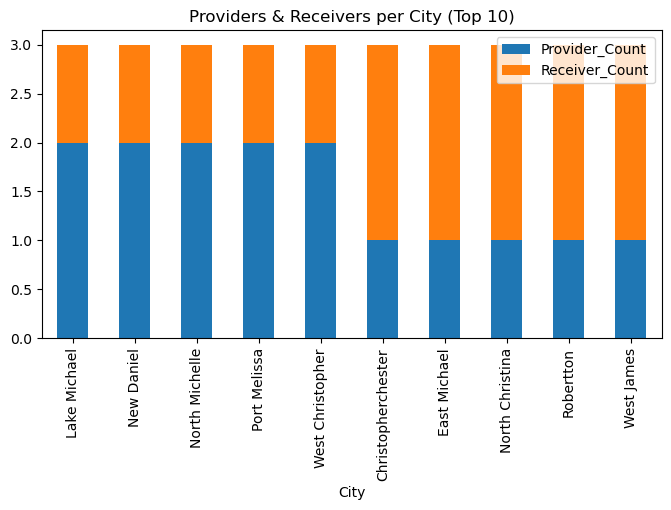

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the existing DB
conn = sqlite3.connect("lfwms.db")
cursor = conn.cursor()

# Helper to run query and display as dataframe
def run_query(sql, params=None):
    if params:
        df = pd.read_sql_query(sql, conn, params=params)
    else:
        df = pd.read_sql_query(sql, conn)
    return df

# === Query 1: Providers & Receivers count per city ===
q1 = """
SELECT City, 
       (SELECT COUNT(*) FROM providers p WHERE p.City = r.City) AS Provider_Count,
       COUNT(*) AS Receiver_Count
FROM receivers r
GROUP BY City
ORDER BY Provider_Count DESC, Receiver_Count DESC
LIMIT 10;
"""
df1 = run_query(q1)
print("Top 10 cities with Providers & Receivers count:")
display(df1)

# Optional visualization
df1.plot(x="City", kind="bar", stacked=True, figsize=(8,4))
plt.title("Providers & Receivers per City (Top 10)")
plt.show()


# QUERY 2:

Top provider types by total donated quantity:


,Provider_Type,Total_Quantity_Donated
0,Restaurant,6923
1,Supermarket,6696
2,Catering Service,6116
3,Grocery Store,6059


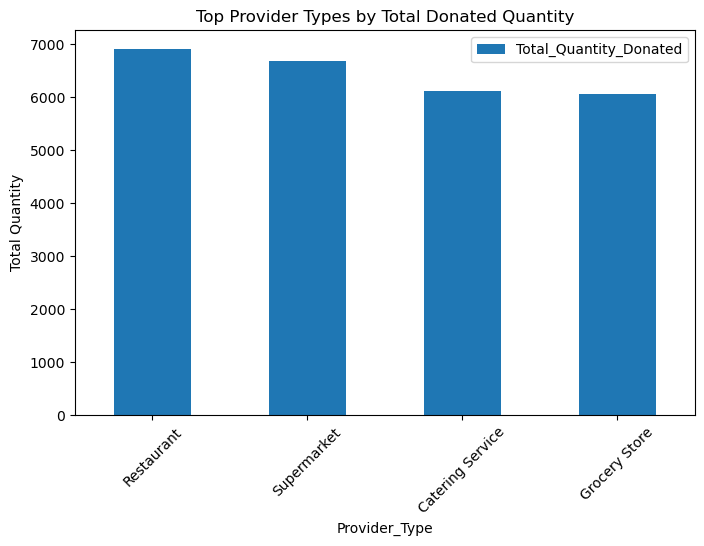

In [3]:
# === Query 2: Top provider type by total donated quantity ===

q2 = """
SELECT p.Type AS Provider_Type,
       SUM(f.Quantity) AS Total_Quantity_Donated
FROM food_listings f
JOIN providers p ON f.Provider_ID = p.Provider_ID
GROUP BY p.Type
ORDER BY Total_Quantity_Donated DESC
LIMIT 10;
"""

df2 = run_query(q2)
print("Top provider types by total donated quantity:")
display(df2)

# Visualization
df2.plot(x="Provider_Type", y="Total_Quantity_Donated", kind="bar", figsize=(8,5))
plt.title("Top Provider Types by Total Donated Quantity")
plt.ylabel("Total Quantity")
plt.xticks(rotation=45)
plt.show()


## QUERY 3:

In [7]:
# === Query 3 : Contact info of providers in a selected city ===

# Step 1: See which cities exist
cities = run_query("SELECT DISTINCT City FROM providers LIMIT 10;")
print("Sample cities in dataset:")
display(cities)

# Step 2: Choose one of the available cities
selected_city = cities.iloc[0, 0]  # pick the first city (or change manually)

q3 = """
SELECT Name, Type, Contact
FROM providers
WHERE City = ?
LIMIT 20;
"""

df3 = run_query(q3, params=(selected_city,))
print(f"Providers in {selected_city}:")
display(df3)


Sample cities in dataset:


,City
0,New Jessica
1,East Sheena
2,Lake Jesusview
3,Mendezmouth
4,Valentineside
5,Shannonside
6,Lake Christopherburgh
7,Washingtonville
8,Tinamouth
9,West Cherylfort


Providers in New Jessica:


,Name,Type,Contact
0,Gonzales-Cochran,Supermarket,+1-600-220-0480


## QUERY 4:

Top 10 receivers by number of claims:


,Receiver_Name,Receiver_Type,Total_Claims
0,Scott Hunter,Individual,5
1,William Frederick,Ngo,5
2,Matthew Webb,Charity,5
3,Anthony Garcia,Individual,5
4,Alvin West,Shelter,4
5,Jennifer Nelson,Individual,4
6,Kristina Simpson,Ngo,4
7,Kristine Martin,Ngo,4
8,Betty Reid,Charity,4
9,Chelsea Powell,Charity,4


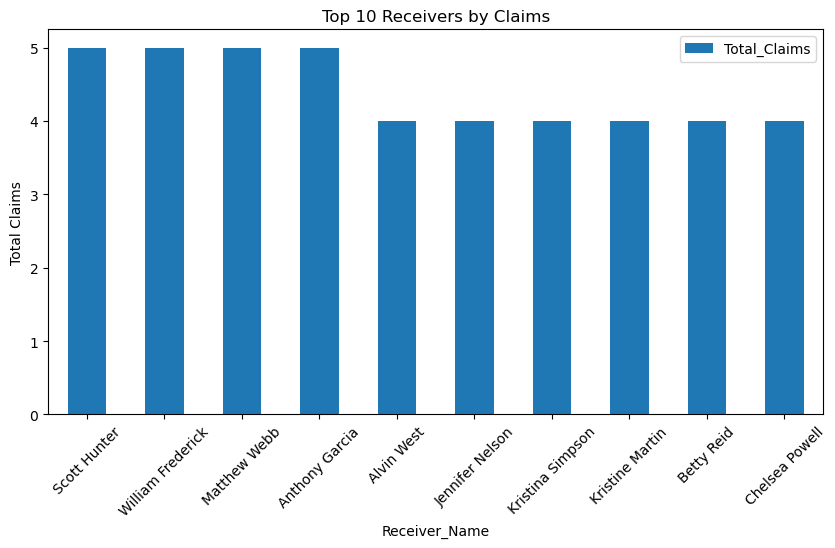

In [8]:
# === Query 4: Receivers who claimed the most items ===

q4 = """
SELECT r.Name AS Receiver_Name,
       r.Type AS Receiver_Type,
       COUNT(c.Claim_ID) AS Total_Claims
FROM claims c
JOIN receivers r ON c.Receiver_ID = r.Receiver_ID
GROUP BY r.Receiver_ID, r.Name, r.Type
ORDER BY Total_Claims DESC
LIMIT 10;
"""

df4 = run_query(q4)
print("Top 10 receivers by number of claims:")
display(df4)

# Visualization
df4.plot(x="Receiver_Name", y="Total_Claims", kind="bar", figsize=(10,5))
plt.title("Top 10 Receivers by Claims")
plt.ylabel("Total Claims")
plt.xticks(rotation=45)
plt.show()


## QUERY 5:

In [9]:
# === Query 5: Total quantity available across all providers ===

q5 = """
SELECT SUM(Quantity) AS Total_Quantity_Available
FROM food_listings;
"""

df5 = run_query(q5)
print("Total food quantity available across all providers:")
display(df5)


Total food quantity available across all providers:


,Total_Quantity_Available
0,25794


## QUERY 6:

Top 10 cities with the highest number of food listings:


,City,Total_Listings
0,South Kathryn,6
1,New Carol,6
2,Perezport,5
3,Jimmyberg,5
4,East Angela,5
5,West Whitneymouth,4
6,West Kevin,4
7,South Thomasville,4
8,South Christopherborough,4
9,Port Patrick,4


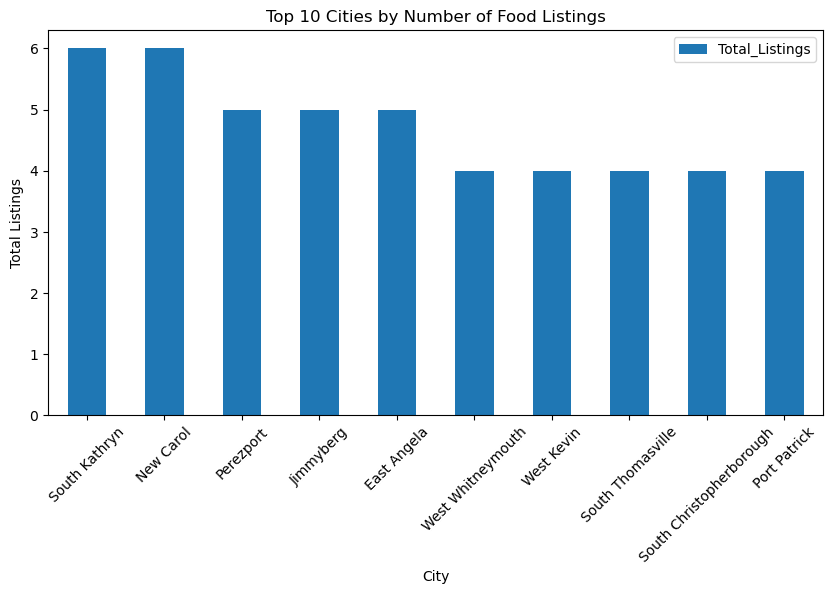

In [10]:
# === Query 6: City with the highest number of food listings ===

q6 = """
SELECT Location AS City,
       COUNT(Food_ID) AS Total_Listings
FROM food_listings
GROUP BY Location
ORDER BY Total_Listings DESC
LIMIT 10;
"""

df6 = run_query(q6)
print("Top 10 cities with the highest number of food listings:")
display(df6)

# Visualization
df6.plot(x="City", y="Total_Listings", kind="bar", figsize=(10,5))
plt.title("Top 10 Cities by Number of Food Listings")
plt.ylabel("Total Listings")
plt.xticks(rotation=45)
plt.show()


## QUERY 7: 

Most common food types:


,Food_Type,Listings_Count,Total_Quantity
0,Veg,336,8340
1,Vegan,334,8798
2,Non-Veg,330,8656


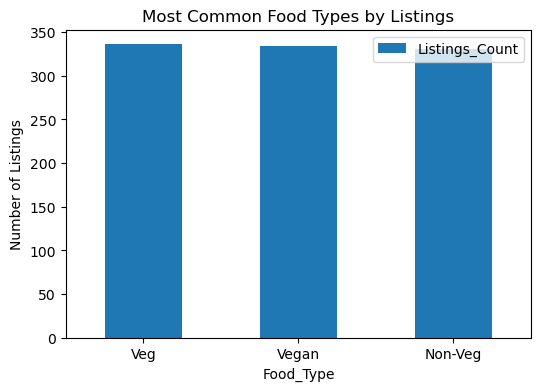

In [11]:
# === Query 7: Most common food types ===

q7 = """
SELECT Food_Type,
       COUNT(Food_ID) AS Listings_Count,
       SUM(Quantity) AS Total_Quantity
FROM food_listings
GROUP BY Food_Type
ORDER BY Listings_Count DESC;
"""

df7 = run_query(q7)
print("Most common food types:")
display(df7)

# Visualization
df7.plot(x="Food_Type", y="Listings_Count", kind="bar", figsize=(6,4))
plt.title("Most Common Food Types by Listings")
plt.ylabel("Number of Listings")
plt.xticks(rotation=0)
plt.show()


## QUERY 8: 

Top 10 food items by claim count:


,Food_Name,Claim_Count
0,Rice,122
1,Soup,114
2,Dairy,110
3,Fish,108
4,Salad,106
5,Chicken,102
6,Bread,94
7,Pasta,87
8,Vegetables,86
9,Fruits,71


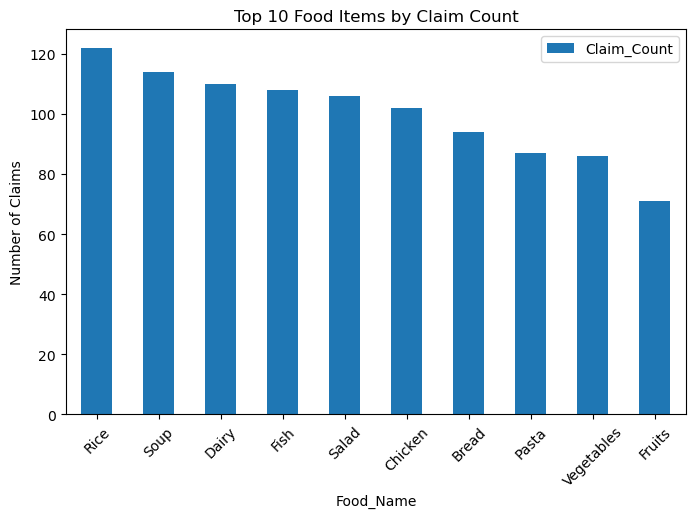

In [12]:
# === Query 8: Claim counts per food item ===

q8 = """
SELECT f.Food_Name,
       COUNT(c.Claim_ID) AS Claim_Count
FROM claims c
JOIN food_listings f ON c.Food_ID = f.Food_ID
GROUP BY f.Food_Name
ORDER BY Claim_Count DESC
LIMIT 10;
"""

df8 = run_query(q8)
print("Top 10 food items by claim count:")
display(df8)

# Visualization
df8.plot(x="Food_Name", y="Claim_Count", kind="bar", figsize=(8,5))
plt.title("Top 10 Food Items by Claim Count")
plt.ylabel("Number of Claims")
plt.xticks(rotation=45)
plt.show()


## QUERY 9:

Top 10 providers by successful claims:


,Provider_Name,Provider_Type,Successful_Claims
0,Barry Group,Restaurant,5
1,"Harper, Blake and Alexander",Catering Service,4
2,"Barnes, Castro and Curtis",Restaurant,4
3,Butler-Richardson,Grocery Store,4
4,Miller Inc,Grocery Store,4
5,Campbell LLC,Supermarket,3
6,Bradford-Martinez,Supermarket,3
7,Nelson LLC,Restaurant,3
8,Rogers-Warren,Grocery Store,3
9,Beck Inc,Restaurant,3


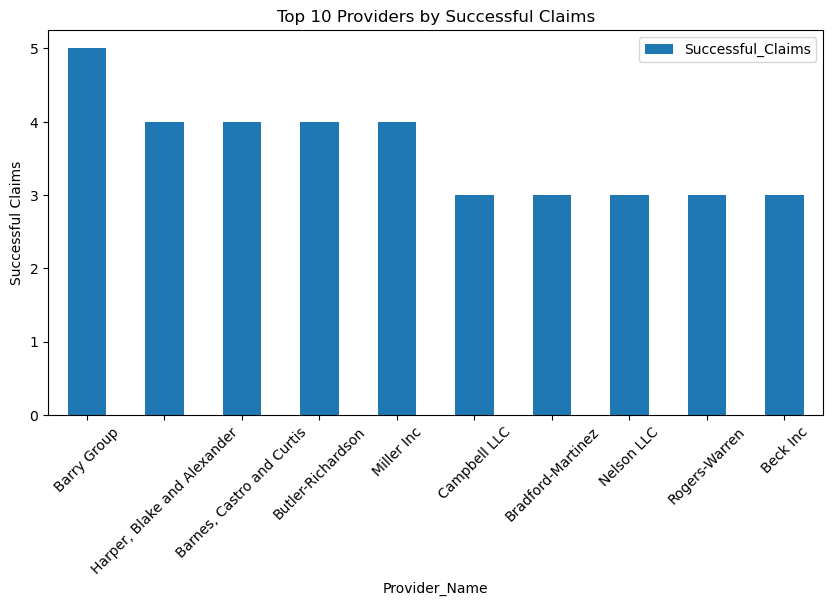

In [13]:
# === Query 9: Provider with the highest number of successful (Completed) claims ===

q9 = """
SELECT p.Name AS Provider_Name,
       p.Type AS Provider_Type,
       COUNT(c.Claim_ID) AS Successful_Claims
FROM claims c
JOIN food_listings f ON c.Food_ID = f.Food_ID
JOIN providers p ON f.Provider_ID = p.Provider_ID
WHERE c.Status = 'Completed'
GROUP BY p.Provider_ID, p.Name, p.Type
ORDER BY Successful_Claims DESC
LIMIT 10;
"""

df9 = run_query(q9)
print("Top 10 providers by successful claims:")
display(df9)

# Visualization
df9.plot(x="Provider_Name", y="Successful_Claims", kind="bar", figsize=(10,5))
plt.title("Top 10 Providers by Successful Claims")
plt.ylabel("Successful Claims")
plt.xticks(rotation=45)
plt.show()


## QUERY 10:

Claim status distribution:


,Status,Claim_Count,Percentage
0,Cancelled,336,33.6
1,Completed,340,34.0
2,Pending,324,32.4


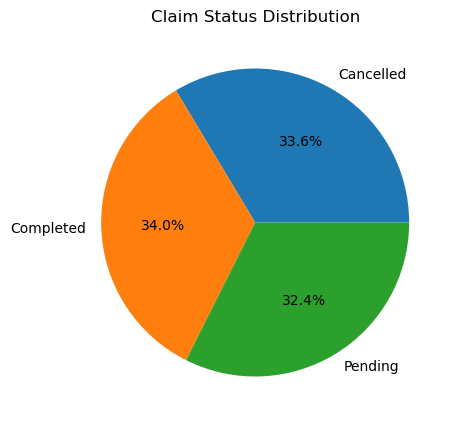

In [15]:
# === Query 10: Claim status distribution ===

q10 = """
SELECT Status,
       COUNT(*) AS Claim_Count,
       ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM claims), 2) AS Percentage
FROM claims
GROUP BY Status;
"""

df10 = run_query(q10)
print("Claim status distribution:")
display(df10)

# Visualization
df10.set_index("Status")["Claim_Count"].plot(kind="pie", autopct="%1.1f%%", figsize=(5,5))
plt.title("Claim Status Distribution")
plt.ylabel("")
plt.show()


## QUERY 11:

Top 10 receivers by average quantity claimed per claim:


,Receiver_Name,Receiver_Type,Avg_Quantity_Claimed
0,Nancy Silva,Individual,50.0
1,Lisa Pitts,Shelter,50.0
2,Daniel Williams,Shelter,50.0
3,Peggy Knight,Shelter,50.0
4,Christopher Wright,Shelter,50.0
5,Nancy Jones,Shelter,50.0
6,Thomas Villanueva,Ngo,50.0
7,Angel Adams,Shelter,49.0
8,Alexander Mullins,Charity,49.0
9,Scott Brown,Ngo,49.0


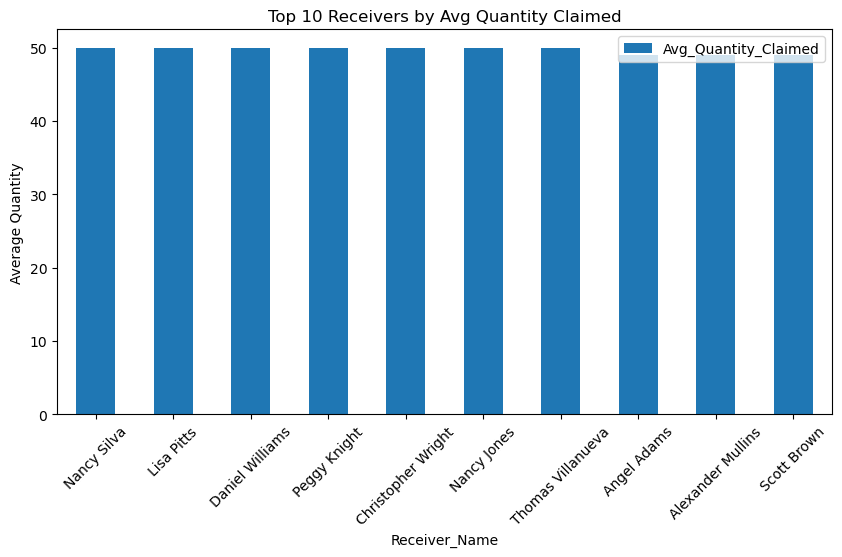

In [16]:
# === Query 11: Average quantity claimed per receiver ===

q11 = """
SELECT r.Name AS Receiver_Name,
       r.Type AS Receiver_Type,
       ROUND(SUM(f.Quantity) * 1.0 / COUNT(c.Claim_ID), 2) AS Avg_Quantity_Claimed
FROM claims c
JOIN food_listings f ON c.Food_ID = f.Food_ID
JOIN receivers r ON c.Receiver_ID = r.Receiver_ID
GROUP BY r.Receiver_ID, r.Name, r.Type
ORDER BY Avg_Quantity_Claimed DESC
LIMIT 10;
"""

df11 = run_query(q11)
print("Top 10 receivers by average quantity claimed per claim:")
display(df11)

# Visualization
df11.plot(x="Receiver_Name", y="Avg_Quantity_Claimed", kind="bar", figsize=(10,5))
plt.title("Top 10 Receivers by Avg Quantity Claimed")
plt.ylabel("Average Quantity")
plt.xticks(rotation=45)
plt.show()


## QUERY 12:

Most claimed meal types:


,Meal_Type,Claim_Count,Total_Quantity_Claimed
0,Breakfast,278,7363
1,Lunch,250,6373
2,Snacks,240,6336
3,Dinner,232,5887


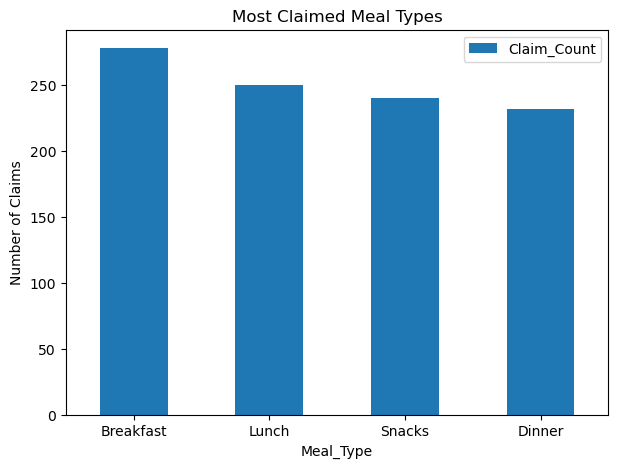

In [17]:
# === Query 12: Most-claimed meal type ===

q12 = """
SELECT f.Meal_Type,
       COUNT(c.Claim_ID) AS Claim_Count,
       SUM(f.Quantity) AS Total_Quantity_Claimed
FROM claims c
JOIN food_listings f ON c.Food_ID = f.Food_ID
GROUP BY f.Meal_Type
ORDER BY Claim_Count DESC;
"""

df12 = run_query(q12)
print("Most claimed meal types:")
display(df12)

# Visualization
df12.plot(x="Meal_Type", y="Claim_Count", kind="bar", figsize=(7,5))
plt.title("Most Claimed Meal Types")
plt.ylabel("Number of Claims")
plt.xticks(rotation=0)
plt.show()


## QUERY 13:

Top 10 providers by total quantity donated:


,Provider_Name,Provider_Type,Total_Quantity_Donated
0,Barry Group,Restaurant,179
1,"Evans, Wright and Mitchell",Catering Service,158
2,Smith Group,Restaurant,150
3,Nelson LLC,Restaurant,142
4,Ruiz-Oneal,Grocery Store,140
5,Blankenship-Lewis,Catering Service,124
6,Kelly-Ware,Catering Service,123
7,Campbell LLC,Supermarket,123
8,Bradford-Martinez,Supermarket,121
9,Hampton-Lee,Supermarket,116


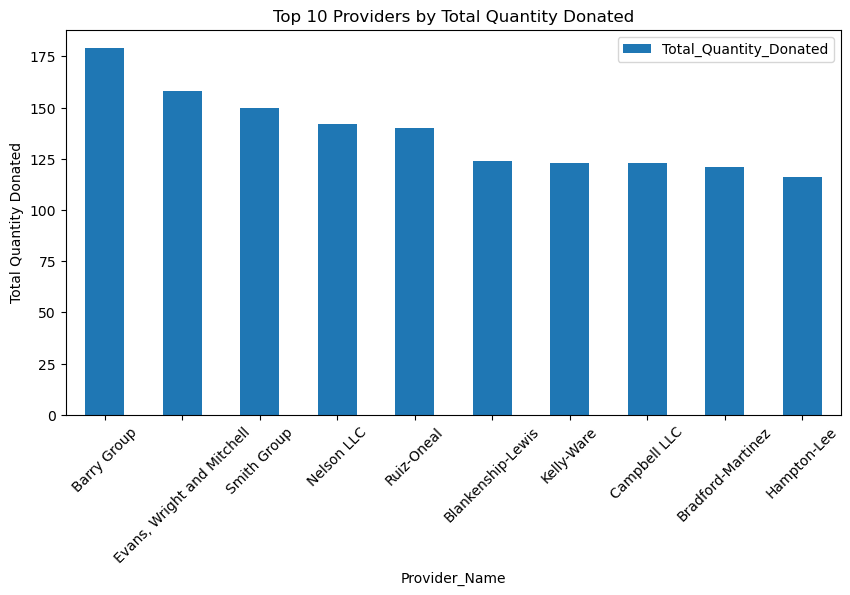

In [18]:
# === Query 13: Total quantity donated by each provider ===

q13 = """
SELECT p.Name AS Provider_Name,
       p.Type AS Provider_Type,
       SUM(f.Quantity) AS Total_Quantity_Donated
FROM food_listings f
JOIN providers p ON f.Provider_ID = p.Provider_ID
GROUP BY p.Provider_ID, p.Name, p.Type
ORDER BY Total_Quantity_Donated DESC
LIMIT 10;
"""

df13 = run_query(q13)
print("Top 10 providers by total quantity donated:")
display(df13)

# Visualization
df13.plot(x="Provider_Name", y="Total_Quantity_Donated", kind="bar", figsize=(10,5))
plt.title("Top 10 Providers by Total Quantity Donated")
plt.ylabel("Total Quantity Donated")
plt.xticks(rotation=45)
plt.show()


## QUERY 14:

Food listings expiring between 2025-03-15 and 7 days after:


,Food_Name,Quantity,Expiry_Date,Provider_Name,Location
0,Fruits,15,2025-03-16,Cannon-Garcia,Kellytown
1,Soup,4,2025-03-16,Moore-Flowers,Clarkberg
2,Rice,50,2025-03-16,"Lucas, Bush and Miller",North Michelle
3,Rice,30,2025-03-16,"Powers, Clark and Snyder",North Jamesberg
4,Fruits,13,2025-03-16,"Gillespie, Foster and Boyd",North Carolfurt
5,Bread,47,2025-03-16,Small Ltd,Gaineschester
6,Rice,7,2025-03-16,Maldonado-Davis,Boylechester
7,Pasta,40,2025-03-16,Ayers LLC,North Kennethshire
8,Pasta,28,2025-03-16,Jackson Ltd,Brandyberg
9,Rice,35,2025-03-16,Young-Luna,Linchester


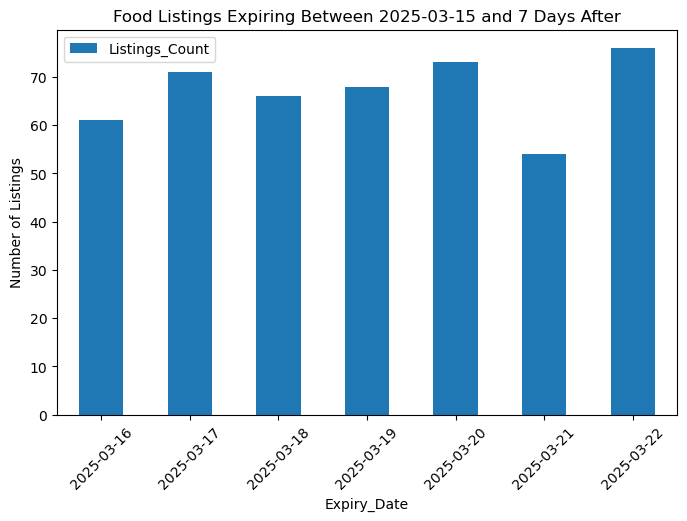

In [20]:
# === Query 14: Listings expiring in the next 7 days (with visualization) ===

# Example: set a custom reference date to align with dataset
reference_date = "2025-03-15"  # pick a date that fits your data
days_ahead = 7

q14_param = f"""
SELECT f.Food_Name,
       f.Quantity,
       DATE(f.Expiry_Date) AS Expiry_Date,
       p.Name AS Provider_Name,
       f.Location
FROM food_listings f
JOIN providers p ON f.Provider_ID = p.Provider_ID
WHERE DATE(f.Expiry_Date) BETWEEN DATE('{reference_date}') AND DATE('{reference_date}', '+{days_ahead} days')
ORDER BY f.Expiry_Date ASC;
"""

df14 = run_query(q14_param)
print(f"Food listings expiring between {reference_date} and {days_ahead} days after:")
display(df14.head(15))

# === Visualization: count of listings per expiry date ===
if not df14.empty:
    expiry_counts = df14.groupby("Expiry_Date")["Food_Name"].count().reset_index(name="Listings_Count")

    expiry_counts.plot(x="Expiry_Date", y="Listings_Count", kind="bar", figsize=(8,5))
    plt.title(f"Food Listings Expiring Between {reference_date} and {days_ahead} Days After")
    plt.ylabel("Number of Listings")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("⚠️ No listings expiring in the selected date range.")


## QUERY 15:

Average time-to-claim per city (in days):


,City,Avg_Days_To_Claim,Total_Claims
0,Phillipsfort,-15.55,6
1,East Stephanie,-13.53,6
2,Lake Andrewmouth,-13.01,9
3,Thomasville,-12.90,6
4,East John,-12.68,7
5,Devinmouth,-11.29,6
6,Jamesfurt,-10.19,9
7,New Carol,-9.81,7
8,South Kathryn,-9.72,7
9,Timothychester,-9.18,6


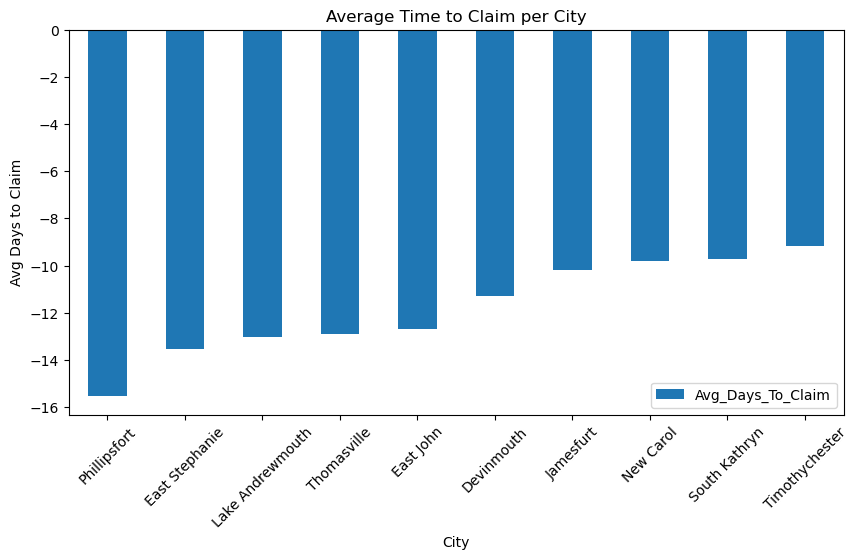

In [21]:
# === Query 15: Average time-to-claim per city ===

q15 = """
SELECT f.Location AS City,
       ROUND(AVG(JULIANDAY(c.Timestamp) - JULIANDAY(f.Expiry_Date)), 2) AS Avg_Days_To_Claim,
       COUNT(c.Claim_ID) AS Total_Claims
FROM claims c
JOIN food_listings f ON c.Food_ID = f.Food_ID
GROUP BY f.Location
HAVING Total_Claims > 5
ORDER BY Avg_Days_To_Claim ASC
LIMIT 10;
"""

df15 = run_query(q15)
print("Average time-to-claim per city (in days):")
display(df15)

# Visualization
if not df15.empty:
    df15.plot(x="City", y="Avg_Days_To_Claim", kind="bar", figsize=(10,5))
    plt.title("Average Time to Claim per City")
    plt.ylabel("Avg Days to Claim")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("⚠️ No claims available to compute time-to-claim.")


## QUERY 16:

Daily trend of claims (March 2025):


,Claim_Date,Daily_Claims
0,2025-03-01,40
1,2025-03-02,47
2,2025-03-03,46
3,2025-03-04,44
4,2025-03-05,47
5,2025-03-06,37
6,2025-03-07,53
7,2025-03-08,56
8,2025-03-09,40
9,2025-03-10,60


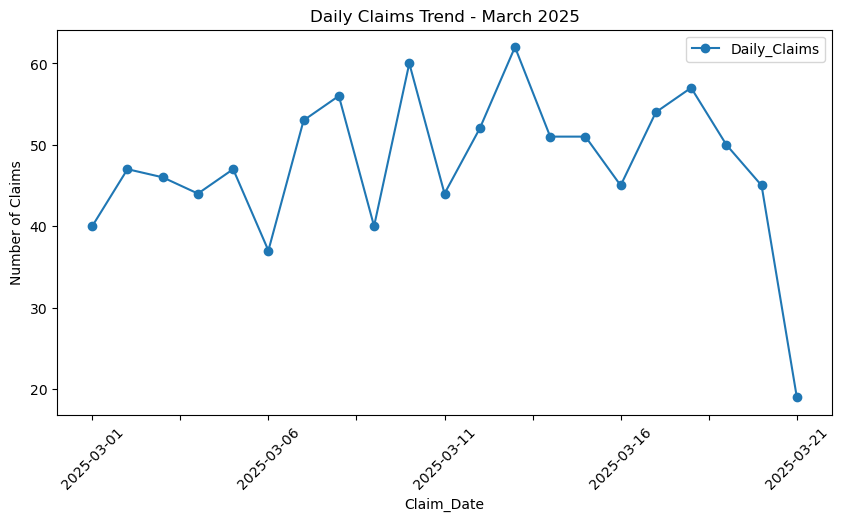

In [22]:
# === Query 16: Daily trend of claims (March 2025) ===

q16 = """
SELECT DATE(c.Timestamp) AS Claim_Date,
       COUNT(c.Claim_ID) AS Daily_Claims
FROM claims c
WHERE strftime('%Y-%m', c.Timestamp) = '2025-03'
GROUP BY Claim_Date
ORDER BY Claim_Date;
"""

df16 = run_query(q16)
print("Daily trend of claims (March 2025):")
display(df16)

# Visualization
if not df16.empty:
    df16.plot(x="Claim_Date", y="Daily_Claims", kind="line", marker='o', figsize=(10,5))
    plt.title("Daily Claims Trend - March 2025")
    plt.ylabel("Number of Claims")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("⚠️ No claims found for March 2025.")


# SQL QUERIES AND ANALYSIS SUMMARY:

### 1. Providers & Receivers

Providers & Receivers per City → Identified top cities with highest concentration of providers and receivers.

Top Provider Type → Supermarkets and restaurants contribute the maximum food quantity.

Provider Contacts by City → Extracted provider details (Name, Type, Contact) for city-specific coordination.

Most Active Receivers → Ranked receivers (NGOs, Shelters, Individuals) by total number of claims.

### 2. Listings & Availability

Total Quantity Available → Calculated overall stock of food items available for distribution.

Top Cities by Listings → Highlighted cities with the largest number of food listings.

Common Food Types → Veg, Non-Veg, and Vegan distribution analyzed; clear dominance of certain categories.

### 3. Claims & Distribution

Claim Counts per Food Item → Found top 10 most-claimed food items (e.g., Bread, Soup, Fruits).

Providers with Most Successful Claims → Identified providers with maximum Completed claims.

Claim Status Distribution → Pie chart showing % Completed, Pending, Cancelled claims.

### 4. Insights & Actionables

Average Quantity per Receiver → Showed which receivers claim larger portions on average.

Most-Claimed Meal Type → Analyzed demand by meal type (Breakfast, Lunch, Dinner, Snacks).

Total Quantity Donated per Provider → Ranked providers by total food donated.

### 5. Advanced Analysis (Beyond 15 Queries)

Expiring Listings (Next 7 Days) → Identified soon-to-expire food for faster allocation.

Average Time-to-Claim per City → Measured how quickly claims are made in different cities.

Daily Claims Trend (March 2025) → Time-series trend of claims activity to spot peaks and patterns.

## 📌 Key Takeaways

The food waste management ecosystem is balanced across providers and receivers, with certain cities emerging as hubs.

Supermarkets & restaurants are the largest contributors in terms of food quantity.

Non-Veg and Vegan items appear frequently in listings, while demand is higher for specific meal types.

Claim processing is active, with strong proportions of Completed claims.

Expiry-based prioritization and city-wise claim speed provide actionable insights for better planning.